# <img src="https://img.icons8.com/dusk/64/000000/mind-map.png" style="height:50px;display:inline"> CS 236756 - Technion - Intro to Machine Learning
---
#### Tal Daniel

## Tutorial 05 - Evaluation & Cross-Validation
---

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---
* [Motivation](#-Motivation---Why-Evaluate-Classifier's-Generalization-Ability?)
* [Metrics for Classifier's Evaluation](#-Metrics-for-Classifier's-Evaluation)
* [Methods for Classifier's Evaluation](#-Methods-for-Classifier's-Evaluation)
    * [Holdout](#-Hold-Out-Method)
    * [Stratification](#-Stratification)
    * [K-Fold Cross-Validation](#-K-Fold-Cross-Validation)
    * [Leave-One-Out](#-Leave-One-Out-Cross-Validation)
* [Classification Example - Breast Cancer - From Zero to Hero](#-Classification-Example---Breast-Cancer---From-Zero-to-Hero)
* [The ROC Curve](#-The-ROC-Curve)
* [Recommended Videos](#-Recommended-Videos)
* [Credits](#-Credits)

In [1]:
# imports for the tutorial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

## <img src="https://img.icons8.com/dusk/64/000000/confetti.png" style="height:50px;display:inline"> Motivation - Why Evaluate Classifier's Generalization Ability?
---
It is important to evaluate the classifier generalization performance in order to:
* Determine whether to employ/distribute the classifier
* Compare classifiers (even compare the same type of classifiers, but with different parameters)
* Optimize the classifier to perform better on unseen data

### <img src="https://img.icons8.com/bubbles/50/000000/info.png" style="height:50px;display:inline"> What Do We Need To Do That?
---
The first question that needs to be asked is: what preparations are needed in order to evaluate a trained model? 

* **Train-Test Separation** - The *naive* approach is seprating the data into train set and test set, that is, taking a portion of the data for training the model (usually about 80% of the dataset) and save another portion, that the model **has not seen** in order to test the model's performance. This is called the test set (usually about 20% of the dataset).

* Note: Scikit-learn has a function we can use called `train_test_split` that makes it easy for us to split our dataset into training and testing data.

How do we make sure the separation is fair and that each set (train and test) is a good representation of the data distribution?

* **Shuffling** - Shuffling the data serves the purpose of reducing variance and making sure that models remain general and overfit less. The popular case where shuffling is very important is when the data is sorted by their class/target. By shuffling we add randomness that assures that the training/test/validation sets are representative of the overall distribution of the data.

In [2]:
# let's load the cancer dataset, shuffle it and  speratre into train and test set
dataset = pd.read_csv('./datasets/cancer_dataset.csv')
# print the number of rows in the data set
number_of_rows = len(dataset)
print("total samples: {}".format(number_of_rows))
total_positive_samples = np.sum(dataset['diagnosis'].values == 'M')
print("total positive sampels (M): {}, total negative samples (B): {}".format(
    total_positive_samples, number_of_rows - total_positive_samples))
num_train = int(0.8 * number_of_rows)

total samples: 569
total positive sampels (M): 212, total negative samples (B): 357


In [3]:
# reminder, the data looks like this
# dataset.head(10) # the dataset is ordered by the diagnosis
dataset.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
552,924084,B,12.770,29.43,81.35,507.9,0.08276,0.04234,0.01997,0.014990,...,36.00,88.10,594.7,0.12340,0.10640,0.08653,0.06498,0.2407,0.06484,NaN
215,8810987,M,13.860,16.93,90.96,578.9,0.10260,0.15170,0.09901,0.056020,...,26.93,104.40,750.1,0.14600,0.43700,0.46360,0.16540,0.3630,0.10590,NaN
38,855133,M,14.990,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.028990,...,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,NaN
235,88249602,B,14.030,21.25,89.79,603.4,0.09070,0.06945,0.01462,0.018960,...,30.28,98.27,715.5,0.12870,0.15130,0.06231,0.07963,0.2226,0.07617,NaN
501,91504,M,13.820,24.49,92.33,595.9,0.11620,0.16810,0.13570,0.067590,...,32.94,106.00,788.0,0.17940,0.39660,0.33810,0.15210,0.3651,0.11830,NaN
60,858970,B,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.012900,...,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020,NaN
314,894047,B,8.597,18.60,54.09,221.2,0.10740,0.05847,0.00000,0.000000,...,22.44,56.65,240.1,0.13470,0.07767,0.00000,0.00000,0.3142,0.08116,NaN
366,9011494,M,20.200,26.83,133.70,1234.0,0.09905,0.16690,0.16410,0.126500,...,33.81,160.00,1671.0,0.12780,0.34160,0.37030,0.21520,0.3271,0.07632,NaN
73,859983,M,13.800,15.79,90.43,584.1,0.10070,0.12800,0.07789,0.050690,...,20.86,110.30,812.4,0.14110,0.35420,0.27790,0.13830,0.2589,0.10300,NaN
398,904302,B,11.060,14.83,70.31,378.2,0.07741,0.04768,0.02712,0.007246,...,20.35,80.79,496.7,0.11200,0.18790,0.20790,0.05556,0.2590,0.09158,NaN


In [4]:
# we will take the first 2 features as our data (X) and the diagnosis as labels (y)
x = dataset[['radius_mean', 'texture_mean']].values
y = dataset['diagnosis'].values == 'M'  # 1 for Malignant, 0 for Benign
# shuffle
rand_gen = np.random.RandomState(0)
shuffled_indices = rand_gen.permutation(np.arange(len(x)))

x_train = x[shuffled_indices[:num_train]]
y_train = y[shuffled_indices[:num_train]]
x_test = x[shuffled_indices[num_train:]]
y_test = y[shuffled_indices[num_train:]]

print("total training samples: {}, total test samples: {}".format(num_train, number_of_rows - num_train))

total training samples: 455, total test samples: 114


## <img src="https://img.icons8.com/dusk/64/000000/rating.png" style="height:50px;display:inline"> Metrics for Classifier's Evaluation
---
Different ML tasks use different metrics to measure the models' performance, we will introduce several of them, but there are more, and sometimes there are tasks that require hand-crafted metrics (for example, an NLP tasks of translating sentences from Chinese to English is measured by the BLEU score, which is a linguistic measure of language coherence).

Throught this part, we will use the terms: True Positive (TP), False Positive (FP), True Negative (TN), False Negative (FN) which are demonstrated below:
<img src="./assets/tut_05_tp_tf.jpg" style="height:400px">

* **Accuracy** - $\frac{TP + TN}{P + N}$
    * In simple words: how many did we get *right* out of all of the dataset?
    * When not to use *accuracy*?
        * When dealing with *skewed* datasets (i.e., when some classes/labels are more frequent than others). 
* **Error** - $\frac{FP + FN}{P + N}$
    * In simple words: how many did we get *wrong* out of all of the dataset?

* **Precision** - $\frac{TP}{TP + FP}$
    * In simple words: out of all the samples we classified as *positive*, how many of them we got *right*. The accuracy of positive predictions.
    * **Always** calculated along with **Recall**
* **Recall (TP Rate, Sensitivity)** - $\frac{TP}{P} = \frac{TP}{TP + FN}$
    * In simple words: out of all the *positive* samples, how many of them we got *right*. 
    * **Always** calculated along with **Precision**
* **FP Rate** - $\frac{FP}{N} = \frac{FP}{FP + TN}$
    * In simple words: out of all the *negative* samples, how many of them we got *wrong*, or, the ratio of negative instances that are incorrectly classified as positive.

### Quick Examples
---
   * A classifier that is trained to detect videos that are safe for kids. You would probably prefer a classifier that rejects many good videos (low recall) but keeps only safe ones (high precision), rather than a classifier that has a much higher recall but lets a few really bad videos.
   * A classifier trained to detect shoplifters on surveillance images: it is probably fine if your classifier has only 30% precision as long as it has 99% recall (almost all shoplifters will get caught. but a lot of false alarms).

### <img src="https://img.icons8.com/dusk/64/000000/classroom.png" style="height:50px;display:inline"> Example - Naive Classifier Evaluation on the Breast Cancer Dataset
---
Let's create a classifier that classifies new samples by the label probability it has seen in the train set. That is, if it has seen 30% Malignant labels, then with probability 0.3 a new sample is classified as malignant.

We will evaluate using the above metrics.

In [5]:
# probability to tag as malignat
m_prob = np.sum(y_train) / len(y_train)
# probability to tag as benign
b_prob = 1 - m_prob
print("M prob: {:.3f}, B prob: {:.3f}".format(m_prob, b_prob))

M prob: 0.369, B prob: 0.631


In [6]:
# now let's classify the test set
# since we don't look at the data at all we can just randomly sample Ms and Bs in the size of the test set
y_test_pred = np.random.choice([True, False], size=(len(y_test)), p=[m_prob, b_prob])

In [7]:
# let's evaluate
accuracy = np.sum(y_test == y_test_pred) / len(y_test)
print("accuracy: {:.3f} or {:.3f} %".format(accuracy, accuracy * 100))
error = np.sum(y_test != y_test_pred) / len(y_test)
print("error: {:.3f} or {:.3f} %".format(error, error * 100))

accuracy: 0.544 or 54.386 %
error: 0.456 or 45.614 %


In [8]:
precision = np.sum(y_test_pred[y_test]) / np.sum(y_test_pred)
print("precision: {:.3f} or {:.3f} %".format(precision, precision * 100))
recall = np.sum(y_test_pred[y_test]) / np.sum(y_test)
print("recall: {:.3f} or {:.3f} %".format(recall, recall * 100))
fp_rate =  np.sum(y_test_pred[~y_test]) / np.sum(~y_test)
print("FP Rate: {:.3f} or {:.3f} %".format(fp_rate, fp_rate * 100))

precision: 0.395 or 39.474 %
recall: 0.341 or 34.091 %
FP Rate: 0.329 or 32.857 %


In [9]:
# using scikit-learn
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_test_pred)
print("precision: {:.3f} or {:.3f} %".format(precision, precision * 100))
recall = recall_score(y_test, y_test_pred)
print("recall: {:.3f} or {:.3f} %".format(recall, recall * 100))

precision: 0.395 or 39.474 %
recall: 0.341 or 34.091 %


### <img src="https://img.icons8.com/dusk/64/000000/planner.png"  style="height:50px;display:inline"> Confusion Matrix Revisited
---
A better way to evaluate the performance of a classifier is the look at the *confusion matrix*. Each row in a confusion matrix represents an actual class. A perfect classifier would have only *true positives* and *true negatives*, so its confusion matrix would have non-zeros values only on its main diagonal.
<img src="./assets/tut_05_conf_mat.jpg" style="height:200px">

In [10]:
# using scikit-learn
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
conf_mat_df = pd.DataFrame(conf_mat, columns=['Predicted Pos', 'Predicted Neg'], index=['Actual Pos', 'Actual Neg'])
conf_mat_df

,Predicted Pos,Predicted Neg
Actual Pos,47,23
Actual Neg,29,15


* It is sometimes nicer to present confusion matrix as a heat map (the same way you would do for correlation).

### <img src="https://img.icons8.com/ios/100/000000/battle.png" style="height:50px;display:inline"> Precision/Recall Tradeoff
---
**Increasing precision reduces recall, and vice versa.** It is often convenient to combine them into a single metric called the $F_1$ score.

### <img src="https://img.icons8.com/dusk/64/000000/f.png" style="height:50px;display:inline"> The $F_1$ Score
---
It is the *harmonic mean* of precision and recall.
$$F_1 = \frac{2}{\frac{1}{precision} + \frac{1}{recall}} = 2 \times \frac{precision \times recall}{precision + recall} = \frac{TP}{TP + \frac{FN + FP}{2}} $$
Whereas the regular mean treats all values equally , the harmonic mean gives much more weight to **low values**. As a result, the classifier will only get a high $F_1$ score if both recall and precision are high.

The $F_1$ score favors classifiers that have similar precision and recall. This is not always what we want, as seen in the "Quick Examples" above.

In [11]:
# calculating the f1 score
f_1_score = 2 * precision * recall / (precision + recall)
print("f1 score: {:.3f}".format(f_1_score))
# using scikit-learn
from sklearn.metrics import f1_score
f_1_score = f1_score(y_test, y_test_pred)
print("f1 score (scikit): {:.3f}".format(f_1_score))

f1 score: 0.366
f1 score (scikit): 0.366


## <img src="https://img.icons8.com/clouds/100/000000/combo-chart.png" style="height:50px;display:inline"> Methods for Classifier's Evaluation
---
So far we have separated our data to a train set and *test set* to evaluate our classifier. This is also called **hold-out** method.

Let's list the ways we can estimate the metrics for a certain classifier:
* **Training Data**
* **Independent Test Data** (different from hold-out)
* **Hold-Out Method**
* **$K$-fold Cross-Validation**
* **Leave-One-Out Method**
* **Bootstrap Method**
* And more...

We will now present some of them that you will use.

### <img src="https://img.icons8.com/dusk/64/000000/dumbbell.png" style="height:50px;display:inline"> Estimation with Training Data
---
<img src="./assets/tut_05_train.jpg" style="height:100px">

* The accuracy/error estimates on the *training* data **are not** good indicators of performance on future data!
* The reason: new data will probably not be exactly the same as the training data.
* The accuracy/error estimates on the training data measure the degree of classifier's **underfitting** or **overfitting**.

* A typical learning curve usually looks like this: <img src="./assets/tut_05_overfitting.png" style="height:200px">
<a href="http://mlwiki.org/index.php/Overfitting">Image Source</a>

### <img src="https://img.icons8.com/bubbles/100/000000/test-passed.png" style="height:50px;display:inline"> Estimation with Independent Test Data
---
<img src="./assets/tut_05_test.jpg" style="height:100px">

* Estimation with independent test data is used when we have plenty of data and there is **a natural way to generating this data**, that is, there is no need to separate the the train data.
* For example, we wish to learn a certain function, like $f(x) = x^2$, we can generate how many samples we want and we are not bounded to a certain dataset.
* In most ML tasks, we have no natural way of forming data, and we are limited to the data given to us, which is why it is more common to use hold-out.

### <img src="https://img.icons8.com/nolan/64/000000/separate-document.png" style="height:50px;display:inline"> Hold-Out Method
---
<img src="./assets/tut_05_holdout.jpg" style="height:150px">

* The hold-out method **splits** the data into training data and test data. Then, we build a classifier using the train set and test it using the test set.
* The hold-out method is usually used when we have thousands of instances, including several hundred instances from each class.
* Scikit-learn has a built in function that you can use to split the data: `from sklearn.model_selection import train_test_split`

### <img src="https://img.icons8.com/bubbles/100/000000/more.png" style="height:50px;display:inline"> Train-Validation-Test Split
---
* Let's say you have a dataset which you separated into *train* set and *test* set. 
* You want to train a classifier that has hyper-parameters (parameters that are not trained, but are user-selected before the training) that you have to tune. 
    * For example, in the classifier "K-Nearest Neighbours" you need to choose $K$, the number of nearest neighbours needed to perform classification, or in "Stochastic Gradient Descent", you need to choose the learning rate (which is a continuous value, like 0.0001). 

* Would it be fair to train the classifier on the train set for each hyper-parameter and then test it on the test set and finally selecting the best hyper-parameters based on the performance on the test set? **NO!**
    * It is like taking an open-material exam, but instead of bringing all of the material, you bring only the material relevant to the questions asked in the exam. It is sort of cheating.

That is why we seperate into 3 sets:

* **Train Set** - from which the model learns
* **Validation Set** - on which the hyper-parameters are tuned
* **Test Set** - untouched samples on which you test the generalization ability of the model. This set has **never** been seen by the model.

<img src="./assets/tut_05_validation.jpg" style="height:300px">

### <img src="https://img.icons8.com/cotton/64/000000/full-battery.png" style="height:50px;display:inline"> Making the Most of the Data
---
* Once evaluation is complete and you are satisfied with the model, *all* the data can be used to build the final classifier
* Generally, the **larger the training data** the **better the classifier**.
* The **larger the test set** the **more accurate** the error estimate.

### <img src="https://img.icons8.com/clouds/100/000000/color-dropper.png" style="height:50px;display:inline"> Stratification
---
* The *holdout* method reserves a certain amount for testing and uses the remainder for training.
* For **"unbalanced"/skewed** datasets, samples might not be representative.
    * Few or None instances of some classes
* **Stratified Sampling**: balancing the data. If the dataset is not large enough, there is a risk of introducing a significant sampling *bias*. In *stratified sampling*, the population is divided into homogenous subgroups called *strata*, and the right number of instances is sampled from each stratum to guarantee that the test set is representative of the overall population.
    * Makes sure that each class is represented with approximately equal proportions in both subsets.

* For example, when a survey company decides to call 1,000 people to ask them a few questions, they don't just pick up randomly 1,000 people from a phone book. They try to ensure that these 1,000 people are representative of the whole population. In the US, the population is composed of 51.3% female and 48.7% men, so a well-conducted survey in the US would try to maintain this ratio in the samples - 513 females and 487 males.
* In Scikit-learn - `from sklearn.model_selection import StratifiedShuffleSplit` - <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html">Read More Here</a>

### <img src="https://img.icons8.com/nolan/64/000000/delete-sign.png" style="height:50px;display:inline"> K-Fold Cross-Validation
---
* Separating to validation and test sets is not very data efficient as we now allocate less data for training.
* In order to make better use of the data we use a technique called **"Cross Validation"**. 
    * However, in this course we will always do this separation regardless! (we'll use the train set for CV).
* Cross-validation is randomly splitting the data into $k$ groups. One of the groups is used as the test set and the rest are used as the training set. 
* The model is trained on the training set and scored on the test set. Then the process is repeated until each unique group as been used as the test set. This method is also called **"K-Fold Cross Validation"**.

* For example, for 5-fold cross validation, the dataset is split into 5 groups, and the model is trained and tested 5 separate times so each group gets a chance to be the test set. This can be seen in the image below.
<img src="./assets/tut_05_kcv.jpeg" style="height:250px" /> 

    * (Image from Datacamp)

* Cross-validation is *better* than using the holdout method because the holdout method score is dependent on how the data is split into train, validation and test sets. 
* Cross-validation gives the model an opportunity to test on multiple splits so we can get a better idea on how the model will perform on unseen data.

**The steps:**
1. Data is split into $k$ subsets of equal size.
2. Each subset in turn is used for testing and the remainder for training.
3. The estimates are averaged to yield an overall estimate.

**Implementation using Scikit-learn:**
* `cross_val_score` - takes in a classifier, training data, $k$ (number of folds) and the scoring technique ("accuracy" for example). <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html">Read the Doc Here</a>
* `StratifiedKFold` - if you need more control over the cross-validation process than provided in `cross_val_score`, it is possible to implement cross-validation yourself. The `StratifiedKFold` class performs stratified sampling to produce folds that contain a representative ratio of each class. <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html">Read the Doc Here</a>

**More on Cross-Validation:**
* Standard method for evaluation: *stratified 10-fold cross validation*
* Stratification reduces the estimate's *variance* (more confidence in the output)
* An even better method: **repeated** stratified cross-validation
    * For example, 10-fold cross-validation is repeated 10 times and the results are averaged (reduces the variance).
* Which dataset should we use for the $K$-Fold Cross Validation (Train, Test, Validation)?
    * The **test set** - must be untouched, put aside. Don't use it for ANY purpose other than testing.
    * The **validation set** - used to test performances of the models at various stages of the model development (like tuning the hyper-parameters of the model)
    * The **train set** - used for training, including cross-validation. **USE ONLY THIS FOR CV!**

### <img src="https://img.icons8.com/doodle/100/000000/big-puzzle--v1.png" style="height:50px;display:inline"> Leave-One-Out Cross-Validation
---
* A particular form of cross-validation where the number of folds = number of training instances
    * That is, for training set of size $n$, the classifier is built $n$ times
* Makes best use of the data
* Involves **no random subsampling**
* Very computationally **expensive**
* **Stratification is not possible** - it is a big disadvantage
    * It *guarantees* a non-stratified sample because there is only one instance in the test set.
* Extreme example - random datatset split equally into two classes:
    * Best inducer predicts majority class
    * 50% accuracy on fresh data
    * Leave-One-Out CV estimate is 100% error!

#### Pre-proceesing steps on validation steps
---
* Whatever data preparations steps done on the training data, should be able to be applied at the final test on unseen data.
    * For example, if normalizing a feature with a mean, the mean is fixed at the data prep and **not recalculated**. Otherwise, a model that was trained and tested on data that used the former mean may not be adequate.
* Data preparation steps are mostly based on descriptive statistics. So a **larger sample** that provides a **stable statistics** is an advantage.
* By not using the validation set, we have a **better estimate of the "true error"**, which we measure by applying pre-processing steps to test data.
* By using the validation set, we **separate the effect of the pre-processing** from that of the classifier.

## <img src="https://img.icons8.com/color/96/000000/super-hero-female.png" style="height:50px;display:inline"> Classification Example - Breast Cancer - From Zero to Hero
---
We will now demonstrate all that we have learned on the Breast Cancer dataset. For the purpose of the exercise, we will use a classifier called "SGDClassifier" (SVM using Stochastic Gradient Descent). You are not supposed to be familiar with it at this point of the course, you can read more about it <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html">here</a>. We will use it as a black-box algorithm that gives us classification for a certain dataset.

* We will only use *train* and *test* sets since the dataset has limited number of samples and since we are not going to tune the hyper-parameters of the model.
* Each classifier has a **decision function** - for each instance, it computes a score and if that score is greater than some threshold, it assigns the instance to the positive class, or else it assigns it to the negative class (lowering the threshold usually leads to increase in *recall* and reduce in *precision*, and vice versa).
* Finally, will briefly introduce the **ROC Curve**, as a tool to asses to performance of the classifier.

In [12]:
# scikit-learn imports
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [13]:
# prepare the dataset
# we will take the first 2 features as our data (X) and the diagnosis as labels (y)
x = dataset[['radius_mean', 'texture_mean']].values
y = dataset['diagnosis'].values == 'M'  # 1 for Malignat, 0 for Benign
# x = scaler.fit_transform(x)
# shuffle
rand_gen = np.random.RandomState(0)
shuffled_indices = rand_gen.permutation(np.arange(len(x)))

In [14]:
x_train = x[shuffled_indices[:num_train]]
y_train = y[shuffled_indices[:num_train]]
x_test = x[shuffled_indices[num_train:]]
y_test = y[shuffled_indices[num_train:]]

In [15]:
# pre-process - standartization
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

print("total training samples: {}, total test samples: {}".format(num_train, number_of_rows - num_train))

total training samples: 455, total test samples: 114


In [16]:
# create the classifier
sgd_clf = SGDClassifier(random_state=92, max_iter=1000, tol=1e-3)  
# we make the random state constant for reproducible results
# train (fit) using cross validation
k_folds = 10
cross_val_scores = cross_val_score(sgd_clf, x_train, y_train, cv=k_folds, scoring='accuracy')
print("accuracy in each fold:")
print(cross_val_scores)
print("mean training accuracy:")
print(cross_val_scores.mean())

accuracy in each fold:
[0.84782609 0.91304348 0.86956522 0.97826087 0.93478261 0.84782609
 0.84782609 0.73333333 0.93181818 0.88636364]
mean training accuracy:
0.8790645586297761


In [17]:
# Now, fit the classifier to the train data
sgd_clf.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=92, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
# evaluation
y_test_pred = sgd_clf.predict(x_test)
# confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
conf_mat_df = pd.DataFrame(conf_mat, columns=['Predicted Pos', 'Predicted Neg'], index=['Actual Pos', 'Actual Neg'])
conf_mat_df

,Predicted Pos,Predicted Neg
Actual Pos,70,0
Actual Neg,14,30


In [19]:
# accuracy
accuracy = np.sum(y_test == y_test_pred) / len(y_test)
# f1 score
f1 = f1_score(y_test, y_test_pred)
print("accuracy: {:.3f} % , f1 score: {:.3f}".format(accuracy * 100, f1))

accuracy: 87.719 % , f1 score: 0.811


In [20]:
# let's get the scores for some instance
y_scores = sgd_clf.decision_function([x_train[0]])
# for SGDClssifier, the default threshold is 0, anything below is calssified as negative and else positive
print(y_scores)
# let's see the effect of the threshold on the training data
y_scores = cross_val_predict(sgd_clf, x_train, y_train, cv=k_folds, method="decision_function")

[-2.09830569]


In [24]:
def plot_pr_recall_curve(labels, scores):
    precisions, recalls, thresholds = precision_recall_curve(labels, scores)
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1,1,1)
    ax.plot(thresholds, precisions[:-1], "b--", label="Precision")
    ax.plot(thresholds, recalls[:-1], "g-", label="Recall")
    ax.set_xlabel("Threshold")
    ax.set_title("Precision/Recall Tradeoff")
    ax.legend()
    ax.grid()
    ax.set_ylim([0, 1])

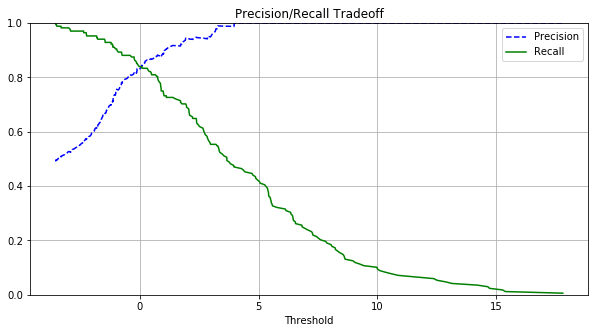

In [25]:
# let's plot and see the effect
plot_pr_recall_curve(y_train, y_scores)

### <img src="https://img.icons8.com/dusk/64/000000/rock-music.png" style="height:50px;display:inline"> The ROC Curve
---
The *receiver operating characteristic* (ROC) curve is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but uses the True Positive Rate (TPR, another name for Recall) vs. the False Positive Rate (FPR, the ratio of negtaive instances that are incorrectly classified as positive) we saw in the beginning of the tutorial.
* Note: The FPR is equal to $1 - TNR$ (true negative rate, or, *specifity*)
* The ROC curve plots *sensitivity* (recall) vs. 1 - *specifity*.
* **TPR/FPR Tradeoff**: The higher the TPR (recall) the more *false positive* (FPR) the classifier produces.
* To compare classifiers - measure the *area under the curve* (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random one will have a 0.5 AUC.
* **Precision/Recall curve vs ROC curve**: if the positive class is rare, or you care more about the false positive than the false negative use **Precision/Recall**. Otherwise, use the ROC curve.

In [27]:
def plot_roc_curve(labels, scores):
    fpr, tpr, thresholds = roc_curve(labels, scores)
    precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(1,1,1)
    ax.plot(fpr, tpr, linewidth=2)
    ax.plot([0,1], [0,1], 'k--') # random classifier
    ax.set_xlabel("False Positive Rate (FPR)")
    ax.set_ylabel("True Positive Rate(TPR=Recall)")
    ax.set_title("ROC Curve")
    ax.grid()
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])

ROC AUC Score: 0.943


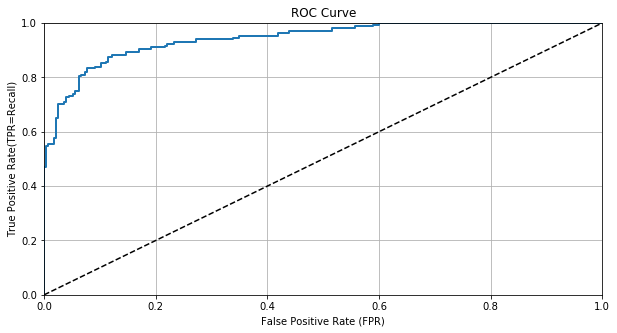

In [28]:
# the ROC curve
plot_roc_curve(y_train, y_scores)
roc_auc = roc_auc_score(y_train, y_scores)
print("ROC AUC Score: {:.3f}".format(roc_auc))

### <img src="https://img.icons8.com/bubbles/50/000000/video-playlist.png" style="height:50px;display:inline"> Recommended Videos
---
#### <img src="https://img.icons8.com/cute-clipart/64/000000/warning-shield.png" style="height:30px;display:inline"> Warning!
* These videos do not replace the lectures and tutorials.
* Please use these to get a better understanding of the material, and not as an alternative to the written material.

#### Video By Subject

* Precision, Recall and F1 - <a href="https://www.youtube.com/watch?v=jJ7ff7Gcq34">Introduction to Precision, Recall and F1 | Classification Models</a>
    * <a href="https://www.youtube.com/watch?v=j-EB6RqqjGI">Precision, Recall & F-Measure</a>
* Stratification - <a href="https://www.youtube.com/watch?v=rsNCCQhkKN8">Sampling 03: Stratified Random Sampling</a>
* Cross-Validation - <a href="https://www.youtube.com/watch?v=7062skdX05Y">What is Cross Validation and its types?</a>
    * K-Fold Cross Validation - <a href="https://www.youtube.com/watch?v=TIgfjmp-4BA">K-Fold Cross Validation - Intro to Machine Learning</a>
* ROC Curve - <a href="https://www.youtube.com/watch?v=OAl6eAyP-yo">ROC Curves and Area Under the Curve (AUC) Explained</a>

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/
* Examples and code snippets were taken from <a href="http://shop.oreilly.com/product/0636920052289.do">"Hands-On Machine Learning with Scikit-Learn and TensorFlow"</a>